# ___Mean-Shift Clustering - Unsupervised Machine Learning___
---

## ___What is Mean-Shift Clustering?___

_Mean-shift is a clustering algorithm, which aims to locate centers of clusters in the most dense area of data points. Mean-shift starts from a ramdom point, where it locates a circular sliding window of radius r (which is a parameter we are able to specify). This parameter can be set manually, but can be estimated using the provided __estimate_bandwidth__ function, which is called if the bandwidth is not set. Mean-shift is shifting step-by-step center point to a region with higher density. The algorithm will shift the sliding window untill he can not find a direction with higher density of data points. When multiple sliding windows iverlap each other, then the window, which contains the biggest number of data points, is choosed as a final cluster._

_Given a set of data points, the algorithm iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster._

<img src="https://cdn-images-1.medium.com/max/800/1*vyz94J_76dsVToaa4VG1Zg.gif"/>


___Kernel Density Estimation___

_The first step when applying mean shift (and all clustering algorithms) is representing your data in a mathematical manner. For mean shift, this means representing your data as points, such as the set below._

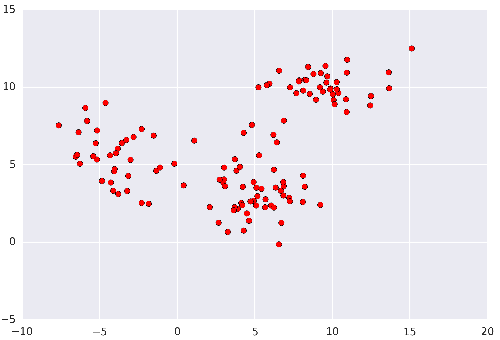

_Mean shift builds upon the concept of kernel density estimation (KDE). Imagine that the above data was sampled from a probability distribution. KDE is a method to estimate the underlying distribution (also called the probability density function) for a set of data._

_It works by placing a kernel on each point in the data set. A kernel is a fancy mathematical word for a weighting function. There are many different types of kernels, but the most popular one is the Gaussian kernel. Adding all of the individual kernels up generates a probability surface (e.g., density function). Depending on the kernel bandwidth parameter used, the resultant density function will vary._

_Below is the KDE surface for our points above using a Gaussian kernel with a kernel bandwidth of 2. The first image is a surface plot, and the second image is a contour plot of the surface._

<img src ='https://spin.atomicobject.com/wp-content/uploads/example_kde_2.png' width = 30% height = 30%/>

<img src ='https://spin.atomicobject.com/wp-content/uploads/example_contour_bw_2.png' width = 30% height = 30%/>


___Mean Shift___

_So how does mean shift come into the picture? Mean shift exploits this KDE idea by imagining what the points would do if they all climbed up hill to the nearest peak on the KDE surface. It does so by iteratively shifting each point uphill until it reaches a peak._

_Depending on the kernel bandwidth used, the KDE surface (and end clustering) will be different. As an extreme case, imagine that we use extremely tall skinny kernels (e.g., a small kernel bandwidth). The resultant KDE surface will have a peak for each point. This will result in each point being placed into its own cluster. On the other hand, imagine that we use an extremely short fat kernels (e.g., a large kernel bandwidth). This will result in a wide smooth KDE surface with one peak that all of the points will climb up to, resulting in one cluster. Kernels in between these two extremes will result in nicer clusterings._

<img src ='https://spin.atomicobject.com/wp-content/uploads/ms_2d_bw_2.gif' width = 30% height = 30%/>

<img src ='https://spin.atomicobject.com/wp-content/uploads/ms_2d_bw_.8.gif' width = 30% height = 30%/>

_The top animation results in three KDE surface peaks, and thus three clusters. The second animation uses a smaller kernel bandwidth, and results in more than three clusters. As with all clustering problems, there is no correct clustering. Rather, correct is usually defined by what seems reasonable given the problem domain and application. Mean shift provides one nice knob (the kernel bandwidth parameter) that can easily be tuned appropriately for different applications._

___Applications___
* _Image Segmentation_
* _Video Processing_
* _Image Processing_

___Advantages___
* _There is no need to specify number of clusters_
* _Algorithm is guaranteed to converge;_

___Drawbacks___
* _Algorithm is mot highly scalable._
* _In sklearn there is no need to specify r, still selection of this parameter is not trivial._

_[Reference](https://www.kaggle.com/maximgolovatchev/unsupervised-learning-clustering-tutorial/notebook)_

## ___Model using sklearn___

In [18]:
# Packages / libraries

import os #provides functions for interacting with the operating system

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import MeanShift
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.4,random_state=101)

C:\Users\PiyushSin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X.shape

(300, 2)

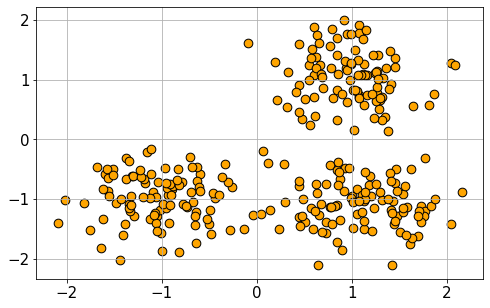

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='orange',s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [5]:
ms_model = MeanShift().fit(X)
cluster_centers = ms_model.cluster_centers_

In [6]:
labels = ms_model.labels_
labels

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0], d

In [7]:
n_clusters = len(cluster_centers)

In [8]:
print("Number of clusters detected by the algorithm:", n_clusters)

Number of clusters detected by the algorithm: 3


In [9]:
print("Cluster centers detected at:\n\n", cluster_centers)

Cluster centers detected at:

 [[ 1.09954715 -1.09294823]
 [ 0.9931698   1.05074234]
 [-0.99420039 -0.96765319]]


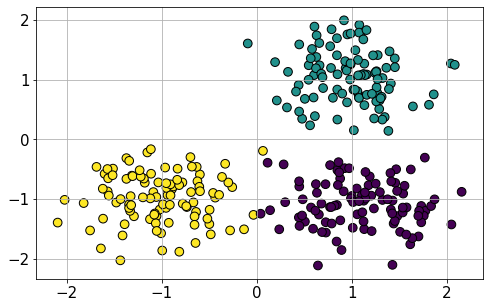

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c=ms_model.labels_,s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### ___Homogeneity___

_Homogeneity metric of a cluster labeling given a ground truth._

_A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way._

In [11]:
print ("Homogeneity score:", metrics.homogeneity_score(labels_true,labels))

Homogeneity score: 0.9405073022327171


### ___Completeness___

_Completeness metric of a cluster labeling given a ground truth._

_A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way._

In [12]:
print("Completeness score:",metrics.completeness_score(labels_true,labels))

Completeness score: 0.9405073022327171


## ___Time Complexity and Model Quality as the Data Grows___

In [13]:
import time
from tqdm import tqdm 

In [14]:
n_samples = [10,20,50,100,200,500,1000,2000,3000,5000,7500,10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_ms = []
homo_ms=[]
complete_ms=[]

for i in tqdm(n_samples):
    X,labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.4,random_state=101)
    t1 = time.time()
    ms_model = MeanShift().fit(X)
    t2=time.time()
    t_ms.append(t2-t1)
    homo_ms.append(metrics.homogeneity_score(labels_true,ms_model.labels_))
    complete_ms.append(metrics.completeness_score(labels_true,ms_model.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [02:21<00:00, 11.80s/it]


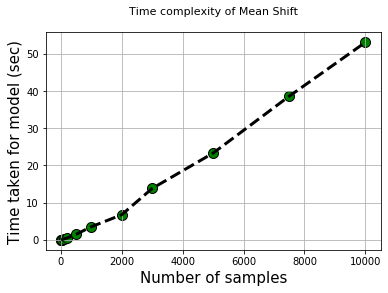

In [15]:
plt.figure(figsize=(6,4))
plt.title("Time complexity of Mean Shift\n",fontsize=11)

plt.scatter(n_samples,t_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,t_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=10)
plt.xlabel("Number of samples",fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Time taken for model (sec)",fontsize=10)
plt.show()

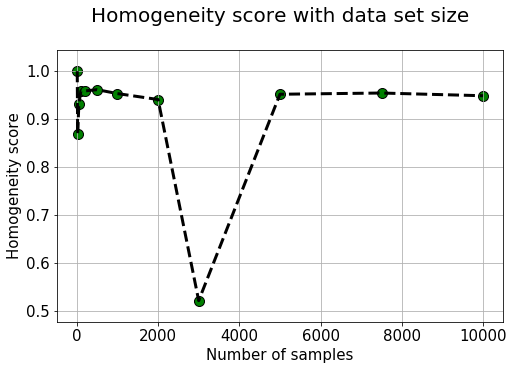

In [42]:
plt.figure(figsize=(6,4))
plt.title("Homogeneity score with data set size\n",fontsize=11)
plt.scatter(n_samples,homo_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,homo_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=10)
plt.xlabel("Number of samples",fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Homogeneity score",fontsize=10)
plt.show()

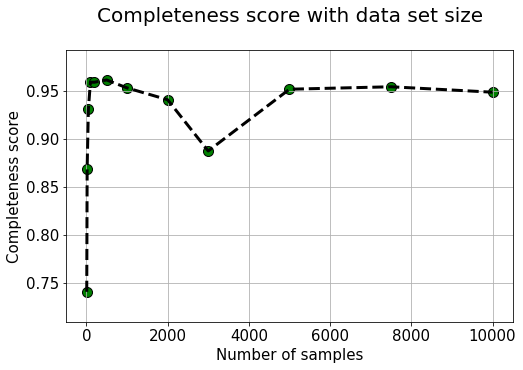

In [43]:
plt.figure(figsize=(6,4))
plt.title("Completeness score with data set size\n",fontsize=11)
plt.scatter(n_samples,complete_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,complete_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=10)
plt.xlabel("Number of samples",fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Completeness score",fontsize=10)
plt.show()

## ___How well the cluster detection works in the presence of noise?___

_Create data sets with varying degree of noise std. dev and run the model to detect clusters._

In [16]:
noise = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25,1.5,1.75,2.0]
n_clusters = []
for i in noise:
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i,random_state=101)
    ms_model=MeanShift().fit(X)
    n_clusters.append(len(ms_model.cluster_centers_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


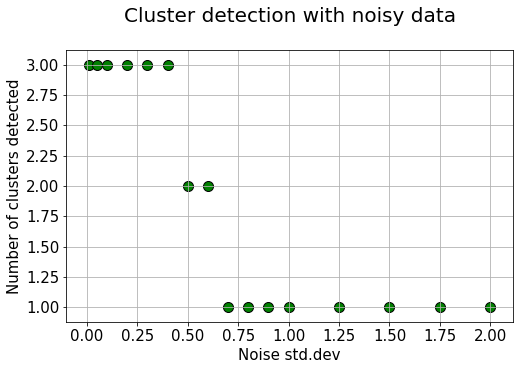

In [46]:
print("Detected number of clusters:",n_clusters)
plt.figure(figsize=(6,4))
plt.title("Cluster detection with noisy data\n",fontsize=11)
plt.scatter(noise,n_clusters,edgecolors='k',c='green',s=100)
plt.grid(True)
plt.xticks(fontsize=10)
plt.xlabel("Noise std.dev",fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Number of clusters detected",fontsize=10)
plt.show()

_We see that the cluster detection works well up to a certain level of noise std. dev, after which the mean of the blobs shifts to the overall centroid and the number of detected clusters tends to 1_

## ___Mall Customer Model___

In [19]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


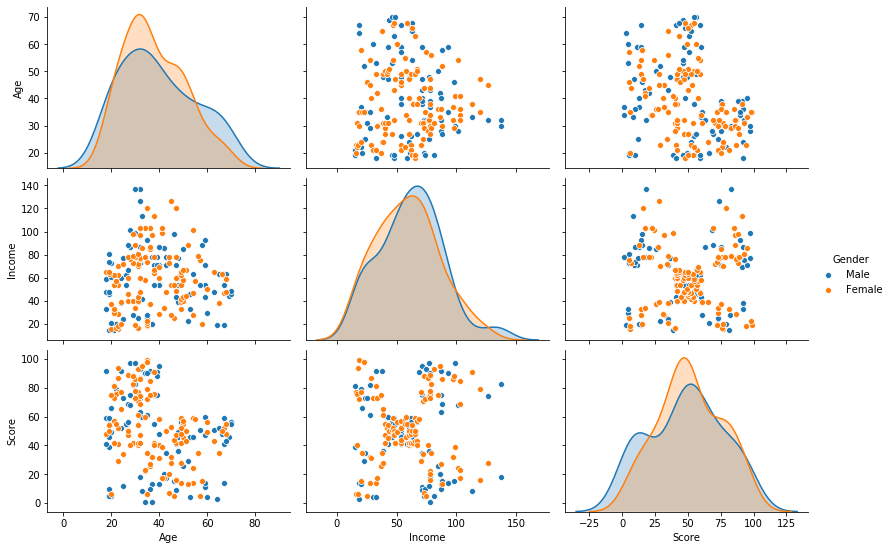

In [21]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

In [25]:
bandwidth

22.173844534734847

In [26]:
ms.bandwidth

22.173844534734847

In [27]:
ms.cluster_centers_

array([[37.26229508, 55.18032787, 49.40983607],
       [32.70967742, 79.77419355, 82.48387097],
       [44.96153846, 83.15384615, 17.42307692],
       [24.61904762, 26.80952381, 76.66666667],
       [45.52941176, 28.29411765, 20.23529412]])

In [28]:
ms.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

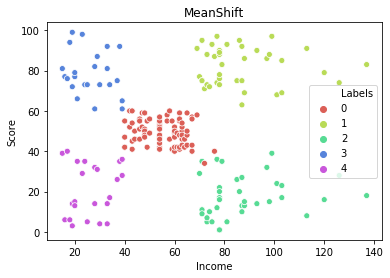

In [24]:
X['Labels'] = ms.labels_
plt.figure(figsize=(6,4))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()